In [1]:
!pip install featuretools


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.9/587.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.2/215.2 kB 13.7 MB/s eta 0:00:00


In [2]:
!pip install woodwork


In [3]:
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import featuretools as ft
import plotly.express as px
from woodwork.logical_types import Categorical, Double, Integer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from featuretools.primitives import TransformPrimitive
from woodwork.column_schema import ColumnSchema
# from imblearn.over_sampling import ADASYN, SMOTE, SVMSMOTE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from bs4 import BeautifulSoup
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer






In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
lemmatizer = WordNetLemmatizer()


In [8]:
with open('/content/drive/MyDrive/stop_words', 'r') as file:
    custom_stop_words = set(lemmatizer.lemmatize(line.strip()) for line in file if line.strip())


In [9]:
# SGCredit = pd.read_csv('Dz_11/data/IMDB Dataset1.csv')

IMDB = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')

IMDB.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
def preprocess_text(text):
    """видалення HTML"""
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

def custom_tokenizer(text):
    """токенізація та лематизація"""
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [11]:
IMDB['sentiment'] = IMDB['sentiment'].map({'positive': 1, 'negative': 0})
IMDB.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


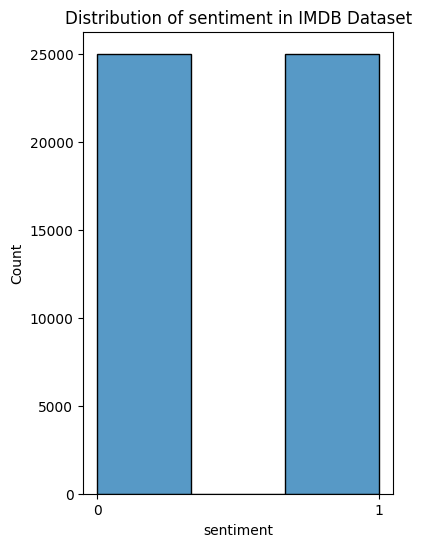

In [12]:
plt.figure(figsize=(4, 6))
sns.histplot(IMDB['sentiment'], bins=3)
plt.title("Distribution of sentiment in IMDB Dataset")
plt.xlabel("sentiment")
plt.ylabel("Count")
plt.xticks(ticks=IMDB['sentiment'].unique(), labels=IMDB['sentiment'].unique())

plt.show()

In [13]:
X = IMDB['review']
y = IMDB['sentiment']
X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Ініціалізація BOW із preprocessor і tokenizer
bow_vectorizer = CountVectorizer(
    preprocessor=preprocess_text,           # Видалення HTML
    tokenizer=custom_tokenizer,            # Токенізація та лематизація
    stop_words=list(custom_stop_words),    # Кастомні стоп-слова
    max_features=5000,                     # Обмеження словника
    lowercase=True,                        # Приведення до нижнього регістру
    # token_pattern=r'[a-zA-Z]+'             # Видалення пунктуації (лише букви)
)


In [15]:
# Перетворення тексту в BOW-представлення
X_train_bow = bow_vectorizer.fit_transform(X_train_text)
X_test_bow = bow_vectorizer.transform(X_test_text)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [16]:
model_bow = LogisticRegression(max_iter=1000)
model_bow.fit(X_train_bow, y_train)
y_pred_bow = model_bow.predict(X_test_bow)

In [17]:
print("Точність BOW:", accuracy_score(y_test, y_pred_bow))
print("Звіт по класифікації BOW:\n", classification_report(y_test, y_pred_bow))

Точність BOW: 0.8757
Звіт по класифікації BOW:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      4961
           1       0.87      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
print("Точність BOW:", accuracy_score(y_test, y_pred_bow))
print("Звіт по класифікації BOW:\n", classification_report(y_test, y_pred_bow))

In [18]:
# TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    preprocessor=preprocess_text,
    tokenizer=custom_tokenizer,
    stop_words=list(custom_stop_words),
    max_features=5000,
    lowercase=True
)

In [19]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [20]:
model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

In [21]:
print("Точність TF-IDF:", accuracy_score(y_test, y_pred_tfidf))
print("Звіт по класифікації TF-IDF:\n", classification_report(y_test, y_pred_tfidf))

Точність TF-IDF: 0.8878
Звіт по класифікації TF-IDF:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# Новий розділ